In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
ev = pd.read_csv("EVChargingStationUsage.csv")
low_memory = False

C:\Users\Asus\AppData\Local\Temp\ipykernel_6468\1648277472.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  ev = pd.read_csv("EVChargingStationUsage.csv")


In [4]:
(ev.isnull().sum()/(len(ev)))*100

Station Name                        0.000000
MAC Address                         0.000000
Org Name                            0.000000
Start Date                          0.000000
Start Time Zone                     0.000000
End Date                            0.000000
End Time Zone                       0.000000
Transaction Date (Pacific Time)     0.080566
Total Duration (hh:mm:ss)           0.000000
Charging Time (hh:mm:ss)            0.000000
Energy (kWh)                        0.000000
GHG Savings (kg)                    0.000000
Gasoline Savings (gallons)          0.000000
Port Type                           0.003469
Port Number                         0.000000
Plug Type                           0.000000
EVSE ID                            30.433090
Address 1                           0.000000
City                                0.000000
State/Province                      0.000000
Postal Code                         0.000000
Country                             0.000000
Latitude  

In [5]:
ev.rename(columns={"Total Duration (hh:mm:ss)":'totalDuration'}, inplace=True)
ev.rename(columns={"Charging Time (hh:mm:ss)":'chargingTime'}, inplace=True)
ev['totalDuration']
ev['chargingTime']

0         1:54:03
1         0:01:54
2         4:17:28
3         2:02:58
4         0:43:54
           ...   
259410    0:35:18
259411    2:14:04
259412    5:08:12
259413    3:53:42
259414    0:41:44
Name: chargingTime, Length: 259415, dtype: object

In [6]:

ev['totalDuration'] = pd.to_timedelta(ev['totalDuration'])
mask = ev['totalDuration'] >= pd.Timedelta(hours=24)
ev.loc[mask, 'totalDuration'] = ev.loc[mask, 'totalDuration'] - pd.Timedelta(days=1)


ev['chargingTime'] = pd.to_timedelta(ev['chargingTime'])
mask = ev['chargingTime'] >= pd.Timedelta(hours=24)
ev.loc[mask, 'chargingTime'] = ev.loc[mask, 'chargingTime'] - pd.Timedelta(days=1)

ev['diff'] = ev['totalDuration'] - ev['chargingTime']

In [7]:
ev['diff']

0        0 days 01:09:29
1        0 days 00:00:12
2        0 days 00:00:04
3        0 days 00:00:26
4        0 days 00:27:30
               ...      
259410   0 days 00:00:26
259411   0 days 01:28:57
259412   0 days 12:20:02
259413   0 days 00:11:52
259414   0 days 00:00:23
Name: diff, Length: 259415, dtype: timedelta64[ns]

In [8]:
# shows that how many persons keep their vehicle in parking even after completion of the charging
overall_percent = (ev['diff'] > pd.Timedelta(0)).sum()/len(ev)*100
overall_percent

99.96376462425071

In [8]:
# This shows the area where the dataset belongs
ev['State/Province'].unique()

array(['California'], dtype=object)

In [9]:
levels = ev['Port Type'].unique()
levels

array(['Level 2', 'Level 1', nan], dtype=object)

In [ ]:
# we tried to show the percentage based on port type but this but we coudn't do it on time 

for value in levels:
    # Filter the DataFrame for rows where the column value matches the current unique value
    filtered_ev = ev[ev['Port Type'] == 'Level 1']
    
    # Perform different functions based on the value
    if value == 'value1':
        # Perform function 1 for value1
        print(f"Function 1 result for {value}: {result}")
    elif value == 'value2':
        # Perform function 2 for value2
        print(f"Function 2 result for {value}: {result}")
    else:
        # Perform a default function for other values
        print(f"Default function result for {value}: {result}")

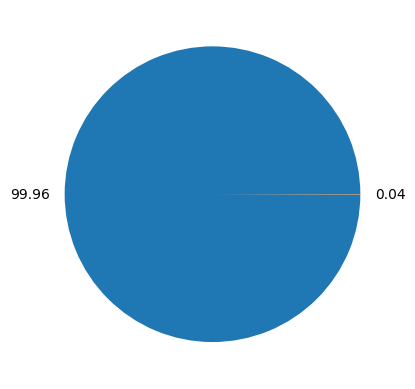

In [11]:

# shows the pie chart for the number of people who dont take their vehicles off parking even after charging 
data = [99.96, 0.04]
plt.pie(data, labels=data)
plt.show()